# Mathematical exercises

**Exercise 1** (3 points): Problem 9.4 in the PRML textbook.

**Exercise 2**: (3 points): Problem 9.14 in the PRML textbook.

# Coding exercises

In the exercises below, we will implement the expectation maximization (EM) algorithm, applying it to a mixture of Gaussians model to describe clustering in data.

Reminder: Once your notebook is complete, you should restart the kernel, run all of the cells in order, and make sure that no errors occur. Notebooks that run successfully without errors will be awarded one extra credit point.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Mixture model for synthetic data

To begin, we'll generate some synthetic data from a mixture of Gaussians model. Each data point is generated from one of two multimodal Gaussian distributions, but the points aren't given any labels.

Text(0, 0.5, 'x2')

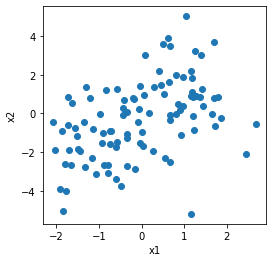

In [12]:
# Make some fake data.

d = 2  # dimensionality of data
n = 100  # total number of data points

# Generate means (we'll use underscores to denote the true parameters, which we'll try to infer below):
mu1_ = np.ones(d)
mu2_ = -np.ones(d)

# Generate covariance matrices as linear combinations of outer products of basis vectors:
vecs = np.random.randn(d,d)
Sigma1_ = np.sum([(0.5+np.random.rand())*np.outer(vecs[i], vecs[i]) for i in range(d)], axis=0)
Sigma2_ = np.sum([(0.5+np.random.rand())*np.outer(vecs[i], vecs[i]) for i in range(d)], axis=0)

# The mixture probabilities:
pi1_, pi2_ = 0.4, 0.6 

# For each data point, choose a cluster that it belongs to and generate its location:
x = np.zeros((0,d))
labels = []  # we won't use cluster labels for fitting, but we'll use it to check the model below
for ii in range(n):
    if np.random.rand() < pi1_:
        x = np.vstack((x, np.random.multivariate_normal(mu1_, Sigma1_)))
        labels.append(0)
    else:
        x = np.vstack((x, np.random.multivariate_normal(mu2_, Sigma2_)))
        labels.append(1)

# Plot the data:
plt.figure(figsize=(4,4))
plt.plot(x[:,0], x[:,1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')

**Exercise 1** (5 points): Implement the EM algorithm to find the maximum likelihood solution for a mixture of Gaussians model with $K=2$ applied to the data above. Report the inferred values of the means and mixture probabilities. Plot the value of the log likelihood at each step in the iteration and show that it converges. Finally, plot the data on top of a contour plot illustrating the expected distribution under the fitted model. The algorithm should be implemented from scratch, with only basic Numpy functions being used.

In [1]:
## Solution ##



**Exercise 2** (3 points): Now fit the same data the easy way using `GaussianMixture` from the `sklearn` library. Report the extimated mean vectors and mixture probabilities, as well as the fraction of cluster labels that are correctly predicted by the model by comparing the model's predicted cluster labels with the vector `labels` that we defined above.

In [2]:
from sklearn.mixture import GaussianMixture

## Solution ##



## Mixture model for the Iris dataset

In class we explored the Iris dataset, which quantifies four characteristics of three different flower subspecies. Let's load that dataset again and look at some of its properties.

In [15]:
# Load the Iris dataset:
from sklearn.datasets import load_iris
data = load_iris()  # data is a dictionary containing lots of things

# List of the features and targets being measured:
print('Features: \n', data['feature_names'])
print('Targets: \n', data['target_names'])

# The input data (each row gives measurements of the features listed above):
X_iris = data['data']
n_samples, n_features = np.shape(data['data'])
print('n_samples, n_features: ', (n_samples, n_features))

# The target data (subspecies identity):
y_iris = data['target']

# Print the first few samples of x and y data:
print('X data: \n', X_iris[:3,:])
print('y data: \n', y_iris[:3])


Features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: 
 ['setosa' 'versicolor' 'virginica']
n_samples, n_features:  (150, 4)
X data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
y data: 
 [0 0 0]


**Exercise 3** (4 points): Fit Gaussian mixture models to this data using the `GaussianMixture` class as above, now for several different values of $K$ (number of clusters). After reading the documentation of this class, plot, for each value of $K$, the model's log likelihood, as well as the Bayesian information criterion (BIC), which is the same as the negative log likelihood but also penalizes the number of parameters in the model (note that lower BIC scores are better; see the textbook or Wikipedia for more details). Give an explanation for why these curves look the way that they do. Based on the results, what number of clusters best describes the data? In general, how does the number of parameters in the mixture model depend on the number of features $M$ and the number of clusters $K$?

In [3]:
## Solution ##

